In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Data

In [4]:
df = pd.read_csv('./MERGED2014_15_PP.csv')
df_2 = pd.read_csv('./MERGED2018_19_PP.csv') 

## Renaming Data Values

In [6]:
control_value = ''
def clean_control(control_code):
    if control_code == 1:
        control_value = 'public'
    elif control_code == 2 or 3:
        control_value = 'private'
    else:
        control_value = 'NaN'
    return(control_value)

In [7]:
region_value = ''
def clean_region(region_code):
    if region_code == 1:
        region_value = 'new england'
    elif region_code == 2:
        region_value = 'mid east'
    elif region_code == 3:
        region_value = 'great lakes'
    elif region_code == 4:
        region_value = 'plains'
    elif region_code == 5:
        region_value = 'southeast'
    elif region_code == 6:
        region_value = 'southwest'
    elif region_code == 7:
        region_value = 'rocky mountains'
    elif region_code == 8:
        region_value = 'far west'
    else:
        region_value = 'other'
    return region_value

In [8]:
pbi_value = ''
def clean_pbi(pbi_code):
    if pbi_code == 1:
            pbi_value = 'pbi'
    else:
        pbi_value = 'not pbi'
    return pbi_value

hbcu_value = ''
def clean_hbcu(hbcu_code):
    if hbcu_code == 1:
            hbcu_value = 'hbcu'
    else:
        hbcu_value = 'not hbcu'
    return hbcu_value

In [9]:
earnings_value = ''
def clean_earnings(earnings_code):
    if earnings_code.isnumeric() == False:
        earnings_value = 0
    else:
        earnings_value = earnings_code
    return earnings_value

## Creating Dataframes

In [10]:
# Identifying key variables

df['white_enroll'] = df['UGDS_WHITE']
df['black_enroll'] = df['UGDS_BLACK']
df['hispanic_enroll'] = df['UGDS_HISP']
df['asian_enroll'] = df['UGDS_ASIAN']
df['control'] = df['CONTROL'].apply(clean_control)
df['avg_sat'] = df['SAT_AVG']
df['region'] = df['REGION'].apply(clean_region)
df['house_inc'] = df['MEDIAN_HH_INC']
df['adm_rate'] = df['ADM_RATE']
df_2['pbi'] = df_2['PBI'].apply(clean_pbi)
df_2['hbcu'] = df_2['HBCU'].apply(clean_hbcu)
df_2['name'] = df['INSTNM']
df['loan'] = df['PCTFLOAN']
df['name'] = df['INSTNM']
df['earnings'] = df['MN_EARN_WNE_P10'].dropna().apply(clean_earnings).astype('float')

# Creating clean dataframes

df_clean = df[['white_enroll', 'black_enroll', 'hispanic_enroll', 'asian_enroll','city', 'state', 'avg_sat','control','region','adm_rate', 'name', 'loan', 'earnings']]
df_2_clean = df_2[['pbi', 'name', 'hbcu']]

## Merging Data

In [11]:
df_merge = df_2_clean.dropna(subset=['pbi','hbcu'])
df_merge = pd.merge(df_clean, df_2_clean, how='inner', on='name')

pbi_count = pd.crosstab(df_merge.region, df_merge.pbi)
hbcu_count = pd.crosstab(df_merge.region, df_merge.hbcu)

## Findings

### Admission Rate vs Race Enrollment

#### White Enrollment

<AxesSubplot:xlabel='white_enroll', ylabel='adm_rate'>

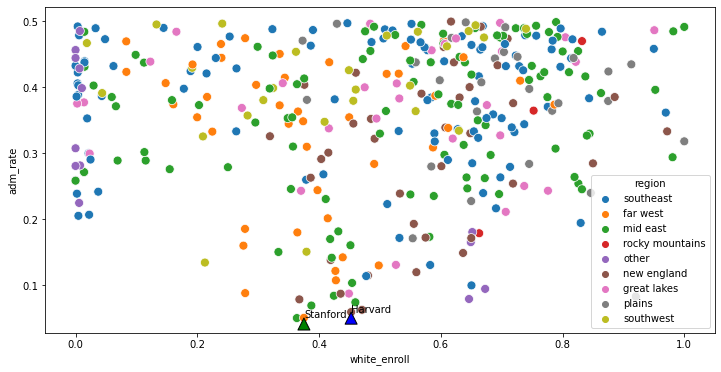

In [18]:
adm = df_merge.dropna(subset=['adm_rate'])
adm = adm[adm.adm_rate<0.5]
adm = adm[adm.adm_rate>0]

plt.figure(figsize=(12,6))
plt.annotate('Stanford', xy=(0.3752, 0.0509), arrowprops = dict(facecolor ='green', shrink = 0.1))
plt.annotate('Harvard', xy=(0.4527, 0.0596), arrowprops = dict(facecolor ='blue', shrink = 0.05))
sns.scatterplot(x='white_enroll', y='adm_rate',hue='region',data=adm, s=80)

<AxesSubplot:xlabel='white_enroll', ylabel='adm_rate'>

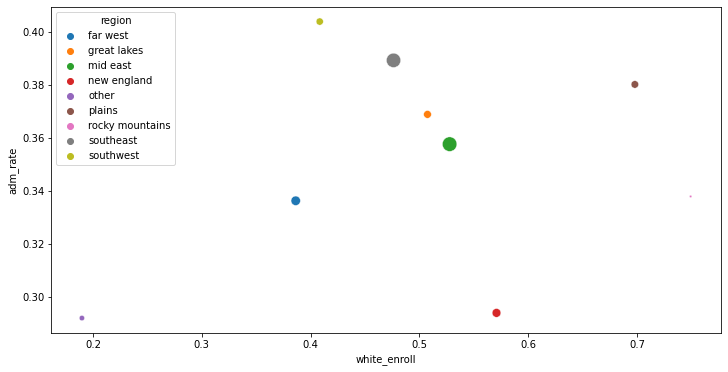

In [14]:
adm = df_merge.dropna(subset=['adm_rate'])
adm = adm[adm.adm_rate<0.5]
adm = adm[adm.adm_rate>0]
adm2 = adm.groupby(['region']).mean()

plt.figure(figsize=(12,6))
sns.scatterplot(x='white_enroll', y='adm_rate',hue='region',data=adm2, s=adm.groupby(['region']).count()['name']*2)

#### Black Enrollment

<AxesSubplot:xlabel='black_enroll', ylabel='adm_rate'>

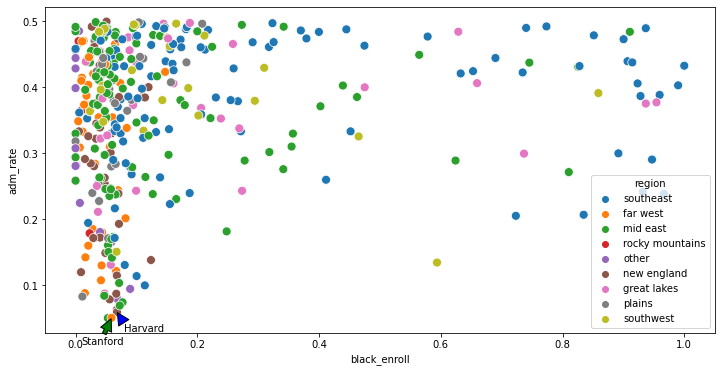

In [17]:
adm = df_merge.dropna(subset=['adm_rate'])
adm = adm[adm.adm_rate<0.5]
adm = adm[adm.adm_rate>0]

plt.figure(figsize=(12,6))
plt.annotate('Stanford', xy=(0.0591, 0.0509),  xytext=(0.01, 0.01), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate('Harvard', xy=(0.0681, 0.0596), xytext=(0.08, 0.03), arrowprops = dict(facecolor ='blue', shrink = 0.05))
sns.scatterplot(x='black_enroll', y='adm_rate',hue='region',data=adm,s=80)

<AxesSubplot:xlabel='black_enroll', ylabel='adm_rate'>

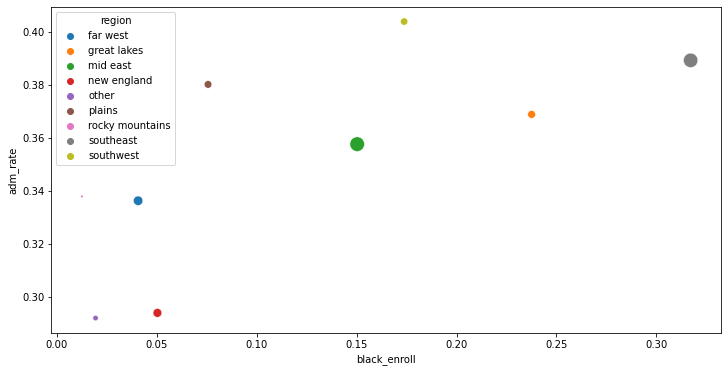

In [19]:
adm = df_merge.dropna(subset=['adm_rate'])
adm = adm[adm.adm_rate<0.5]
adm = adm[adm.adm_rate>0]
adm2 = adm.groupby(['region']).mean()

plt.figure(figsize=(12,6))
sns.scatterplot(x='black_enroll', y='adm_rate',hue='region',data=adm2,s=adm.groupby(['region']).count()['name']*2)

#### Hispanic Enrollment

<AxesSubplot:xlabel='hispanic_enroll', ylabel='adm_rate'>

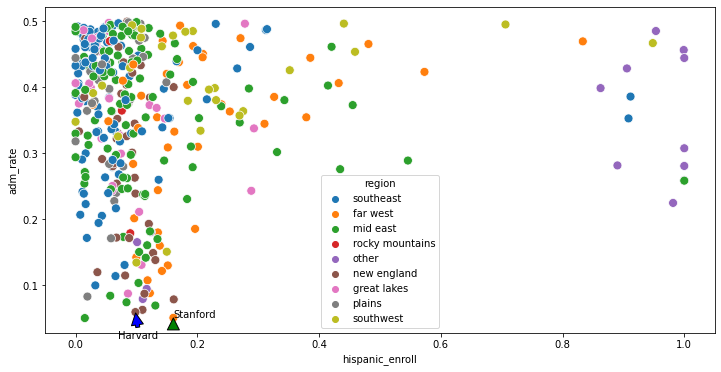

In [20]:
adm = df_merge.dropna(subset=['adm_rate'])
adm = adm[adm.adm_rate<0.5]
adm = adm[adm.adm_rate>0]

plt.figure(figsize=(12,6))
plt.annotate('Stanford', xy=(0.1607, 0.0509), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate('Harvard', xy=(0.0984, 0.0596), xytext=(0.07, 0.02), arrowprops = dict(facecolor ='blue', shrink = 0.05))
sns.scatterplot(x='hispanic_enroll', y='adm_rate',hue='region',data=adm, s=80)

<AxesSubplot:xlabel='hispanic_enroll', ylabel='adm_rate'>

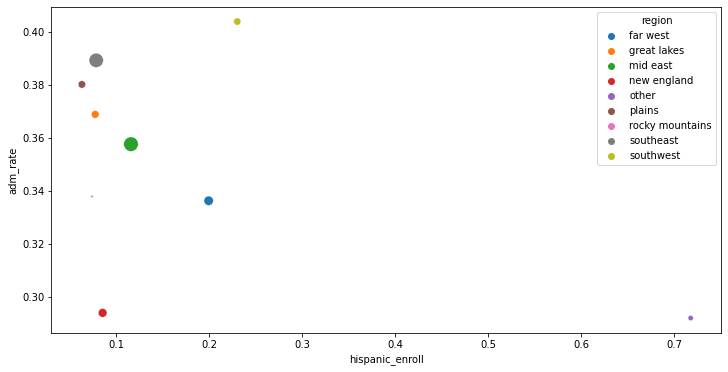

In [22]:
adm = df_merge.dropna(subset=['adm_rate'])
adm = adm[adm.adm_rate<0.5]
adm = adm[adm.adm_rate>0]
adm2 = adm.groupby(['region']).mean()

plt.figure(figsize=(12,6))
sns.scatterplot(x='hispanic_enroll', y='adm_rate',hue='region',data=adm2, s=adm.groupby(['region']).count()['name']*2)

#### Asian Enrollment

<AxesSubplot:xlabel='asian_enroll', ylabel='adm_rate'>

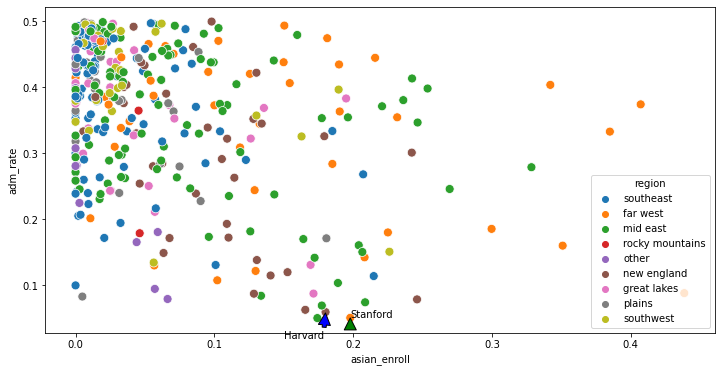

In [23]:
adm = df_merge.dropna(subset=['adm_rate'])
adm = adm[adm.adm_rate<0.5]
adm = adm[adm.adm_rate>0]

plt.figure(figsize=(12,6))
plt.annotate('Stanford', xy=(0.1979, 0.0509), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate('Harvard', xy=(0.1801, 0.0596), xytext=(0.15, 0.02), arrowprops = dict(facecolor ='blue', shrink = 0.05))
sns.scatterplot(x='asian_enroll', y='adm_rate',hue='region',data=adm, s=80)

<AxesSubplot:xlabel='asian_enroll', ylabel='adm_rate'>

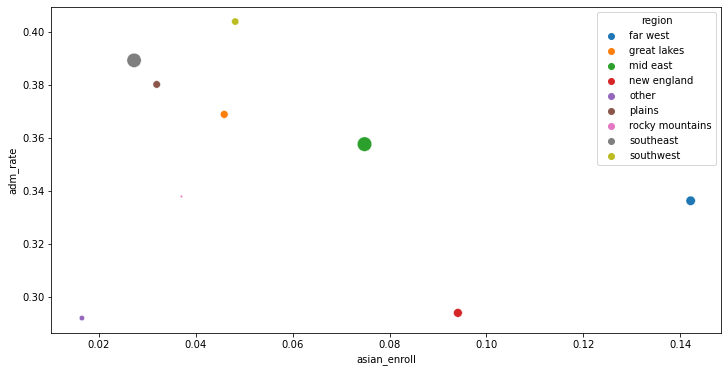

In [24]:
adm = df_merge.dropna(subset=['adm_rate'])
adm = adm[adm.adm_rate<0.5]
adm = adm[adm.adm_rate>0]
adm2 = adm.groupby(['region']).mean()

plt.figure(figsize=(12,6))
sns.scatterplot(x='asian_enroll', y='adm_rate',hue='region',data=adm2, s=adm.groupby(['region']).count()['name']*2)

### Earnings vs Race Enrollment

#### White Enrollment

<AxesSubplot:xlabel='white_enroll', ylabel='earnings'>

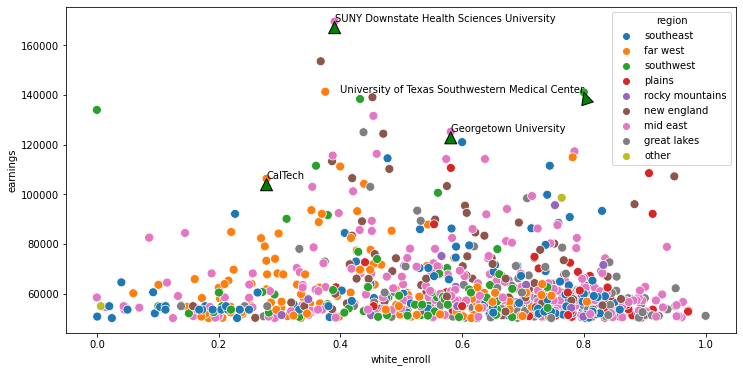

In [25]:
earn = df_merge.dropna(subset=['earnings','white_enroll'])
earn = earn[earn.earnings>50000]

plt.figure(figsize=(12,6))
plt.annotate('CalTech', xy=(0.2787, 106300), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate('Georgetown University', xy=(0.5813, 125200), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate('SUNY Downstate Health Sciences University', xy=(0.3905, 169600.0), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate('University of Texas Southwestern Medical Center', xy=(0.8000, 141100.0), xytext=(0.4, 141100), arrowprops = dict(facecolor ='green', shrink = 0.05))
sns.scatterplot(x='white_enroll', y='earnings',hue='region',data=earn, s=80)

<AxesSubplot:xlabel='white_enroll', ylabel='earnings'>

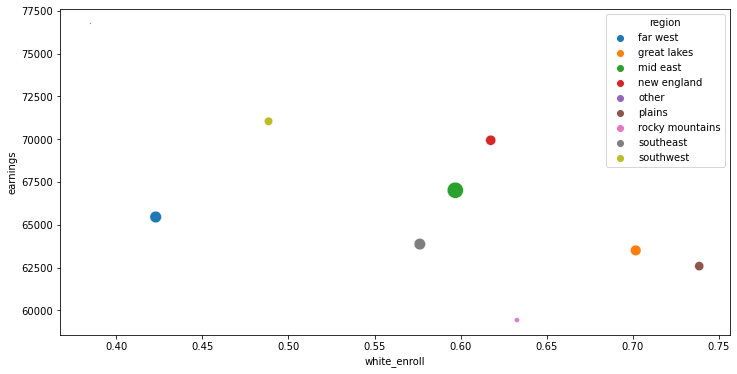

In [31]:
earn = df_merge.dropna(subset=['earnings'])
earn = earn[earn.earnings>50000]
earn2 = earn.groupby('region').mean()

plt.figure(figsize=(12,6))
sns.scatterplot(x='white_enroll', y='earnings',hue='region',data=earn2, s=earn.groupby(['region']).count()['name'])

#### Black Enrollment

<AxesSubplot:xlabel='black_enroll', ylabel='earnings'>

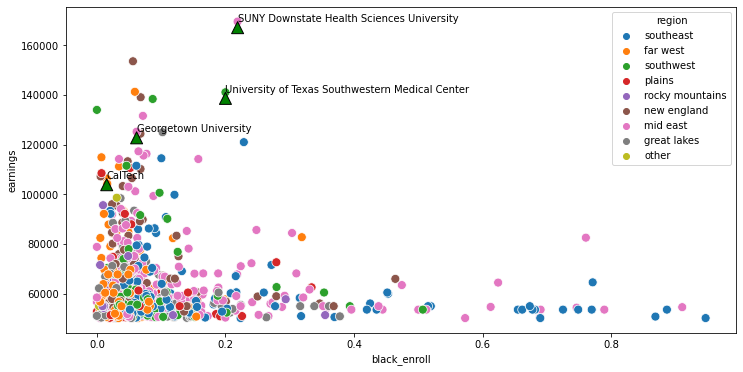

In [26]:
earn = df_merge.dropna(subset=['earnings'])
earn = earn[earn.earnings>50000]

plt.figure(figsize=(12,6))
plt.annotate('CalTech', xy=(0.0153, 106300), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate('Georgetown University', xy=(0.0618, 125200), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate('SUNY Downstate Health Sciences University', xy=(0.2189, 169600.0), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate('University of Texas Southwestern Medical Center', xy=(0.2000, 141100.0), arrowprops = dict(facecolor ='green', shrink = 0.05))
sns.scatterplot(x='black_enroll', y='earnings',hue='region',data=earn, s=80)

<AxesSubplot:xlabel='black_enroll', ylabel='earnings'>

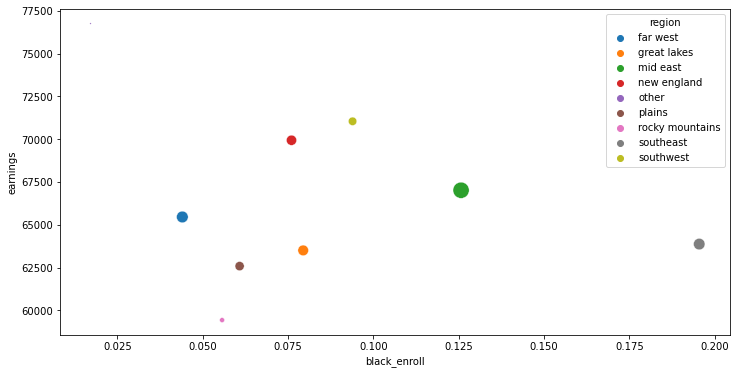

In [32]:
earn = df_merge.dropna(subset=['earnings'])
earn = earn[earn.earnings>50000]
earn2 = earn.groupby('region').mean()

plt.figure(figsize=(12,6))
sns.scatterplot(x='black_enroll', y='earnings',hue='region',data=earn2, s=earn.groupby(['region']).count()['name'])

#### Hispanic Enrollment

<AxesSubplot:xlabel='hispanic_enroll', ylabel='earnings'>

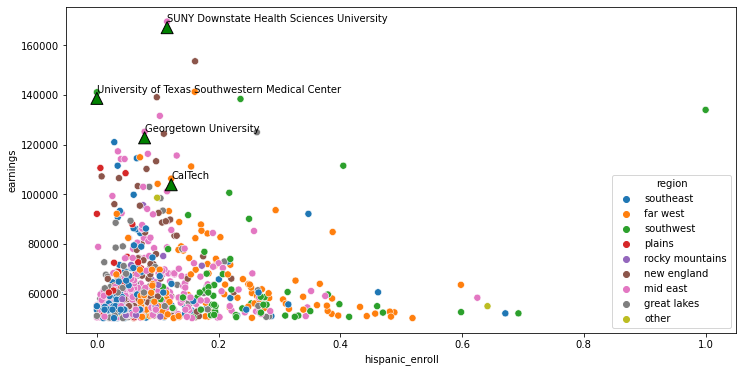

In [27]:
earn = df_merge.dropna(subset=['earnings'])
earn = earn[earn.earnings>50000]

plt.figure(figsize=(12,6))
plt.annotate('CalTech', xy=(0.1221, 106300), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate('Georgetown University', xy=(0.0784, 125200), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate('SUNY Downstate Health Sciences University', xy=(0.1154, 169600.0), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate('University of Texas Southwestern Medical Center', xy=(0, 141100.0), arrowprops = dict(facecolor ='green', shrink = 0.05))
sns.scatterplot(x='hispanic_enroll', y='earnings',hue='region',data=earn, s=50)

In [4]:
earn = df_merge.dropna(subset=['earnings'])
earn = earn[earn.earnings>50000]
earn.sort_values(by=hispanic_enroll, ascending=False)

NameError: name 'df_merge' is not defined

<AxesSubplot:xlabel='hispanic_enroll', ylabel='earnings'>

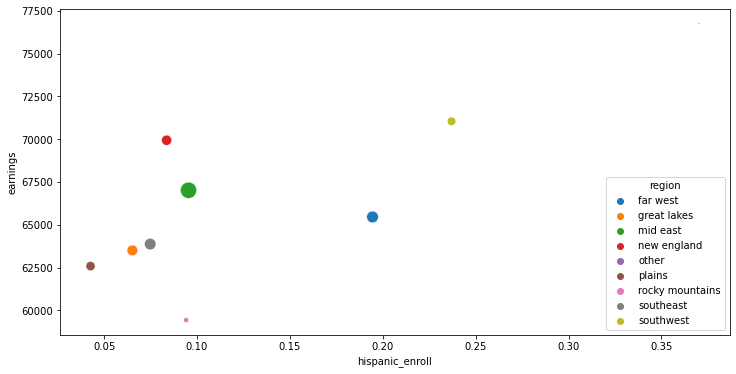

In [33]:
earn = df_merge.dropna(subset=['earnings'])
earn = earn[earn.earnings>50000]
earn2 = earn.groupby('region').mean()

plt.figure(figsize=(12,6))
sns.scatterplot(x='hispanic_enroll', y='earnings',hue='region',data=earn2, s=earn.groupby(['region']).count()['name'])

#### Asian Enrollment

<AxesSubplot:xlabel='asian_enroll', ylabel='earnings'>

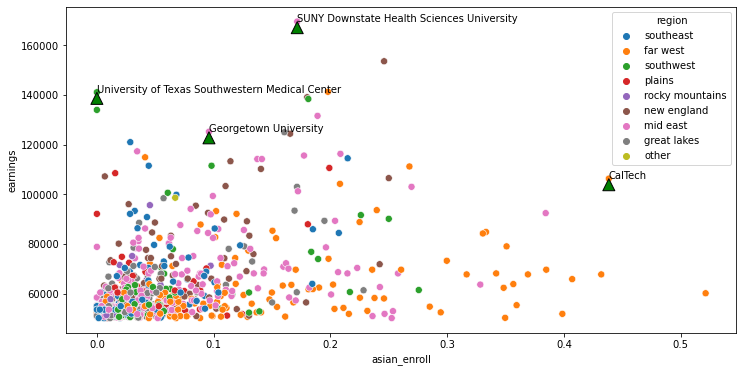

In [28]:
earn = df_merge.dropna(subset=['earnings'])
earn = earn[earn.earnings>50000]

plt.figure(figsize=(12,6))
plt.annotate('CalTech', xy=(0.4385, 106300), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate('Georgetown University', xy=(0.096, 125200), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate('SUNY Downstate Health Sciences University', xy=(0.1716, 169600.0), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate('University of Texas Southwestern Medical Center', xy=(0, 141100.0), arrowprops = dict(facecolor ='green', shrink = 0.05))
sns.scatterplot(x='asian_enroll', y='earnings',hue='region',data=earn, s=50)

<AxesSubplot:xlabel='asian_enroll', ylabel='earnings'>

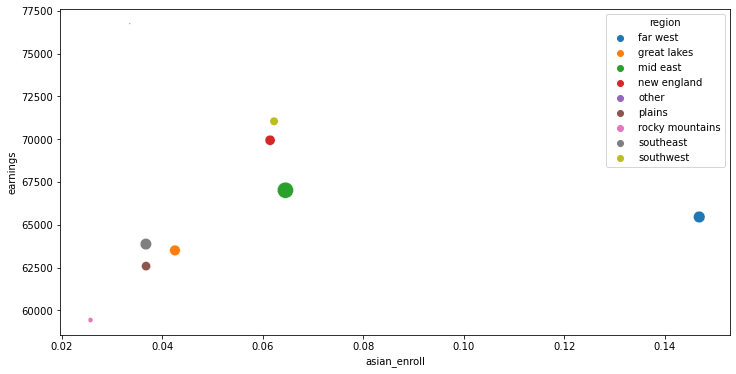

In [34]:
earn = df_merge.dropna(subset=['earnings'])
earn = earn[earn.earnings>50000]
earn2 = earn.groupby('region').mean()

plt.figure(figsize=(12,6))
sns.scatterplot(x='asian_enroll', y='earnings',hue='region',data=earn2, s=earn.groupby(['region']).count()['name'])

### Admissions Rate vs Earnings

<AxesSubplot:xlabel='adm_rate', ylabel='earnings'>

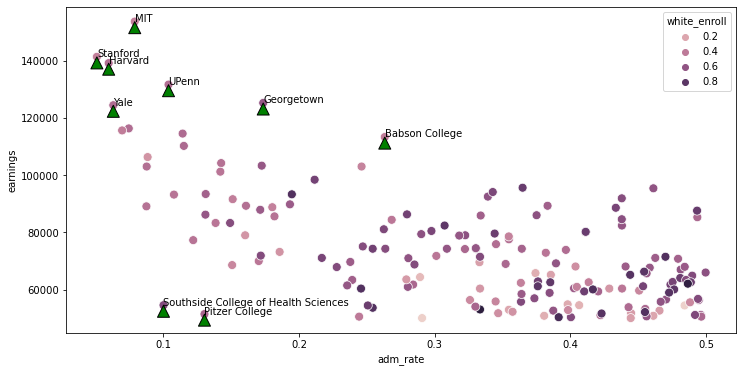

In [57]:
clean = df_merge.dropna(subset=['earnings','adm_rate'])
clean = clean[clean.earnings>50000]
clean = clean[clean.adm_rate<0.5]
clean = clean[clean.adm_rate>0]

plt.figure(figsize=(12,6))
plt.annotate('Stanford', xy=(0.0509, 141300.0), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate('MIT', xy=(0.0788, 153600.0), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate('Harvard', xy=(0.0596, 139100.0), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate('UPenn', xy=(0.1037, 131600.0), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate('Yale', xy=(0.0630, 124400.0), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate('Babson College', xy=(0.2631, 113300.0), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate('Southside College of Health Sciences', xy=(0.1, 54600.0), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate('Georgetown', xy=(0.1735, 125200.0), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate('Pitzer College', xy=(0.1302, 51500.0), arrowprops = dict(facecolor ='green', shrink = 0.05))
sns.scatterplot(x='adm_rate', y='earnings',hue='white_enroll',data=clean, s=80)

<AxesSubplot:xlabel='adm_rate', ylabel='earnings'>

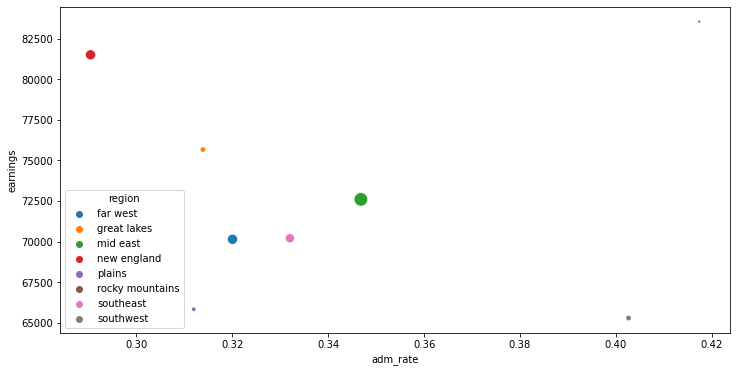

In [47]:
clean = df_merge.dropna(subset=['earnings','adm_rate'])
clean = clean[clean.earnings>50000]
clean = clean[clean.adm_rate<0.5]
clean = clean[clean.adm_rate>0]
clean2 = clean.groupby('region').mean()

plt.figure(figsize=(12,6))
sns.scatterplot(x='adm_rate', y='earnings',hue='region',data=clean2, s=clean.groupby(['region']).count()['name']*3)

### Race Enrollment by Region

#### White Enrollment

[Text(0.5, 0, 'Region'), Text(0, 0.5, '% of White Enrollment')]

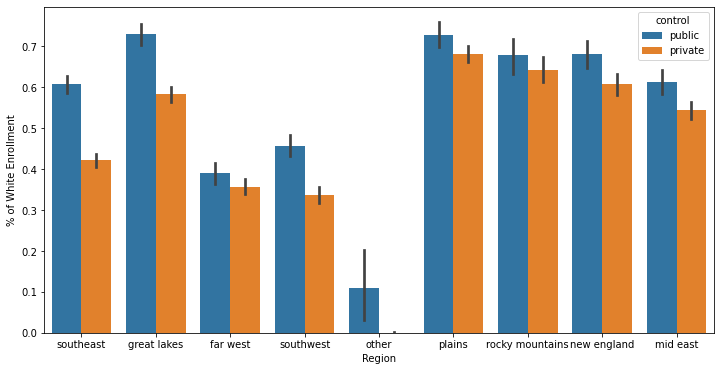

In [35]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=df_clean, x='region', y='white_enroll', hue='control')
ax.set(xlabel = 'Region', ylabel = '% of White Enrollment')

#### Black Enrollment

[Text(0.5, 0, 'Region'), Text(0, 0.5, '% of Black Enrollment')]

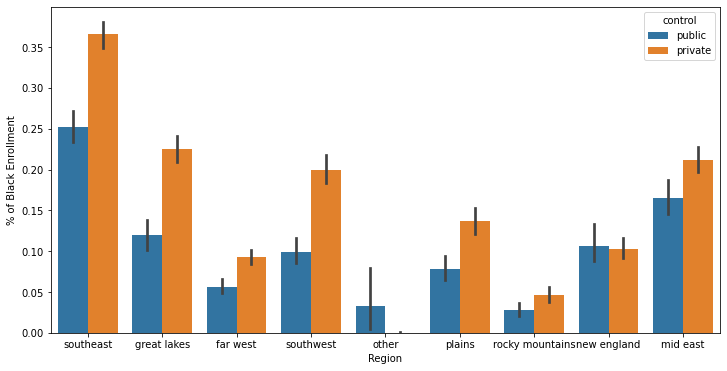

In [36]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=df_clean, x='region', y='black_enroll', hue='control')
ax.set(xlabel = "Region", ylabel = "% of Black Enrollment")

#### Hispanic Enrollment

[Text(0.5, 17.200000000000003, 'Region'),
 Text(17.200000000000003, 0.5, '% of Hispanic Enrollment')]

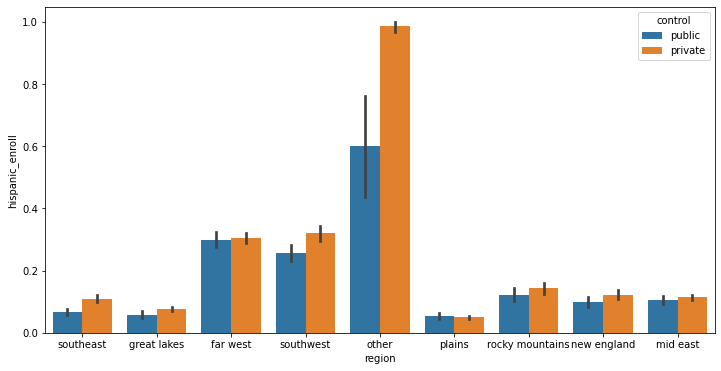

In [37]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_clean, x='region', y='hispanic_enroll', hue='control')
ax.set(xlabel = "Region", ylabel = "% of Hispanic Enrollment")

#### Asian Enrollment

[Text(0.5, 17.200000000000003, 'Region'),
 Text(17.200000000000003, 0.5, '% of Asian Enrollment')]

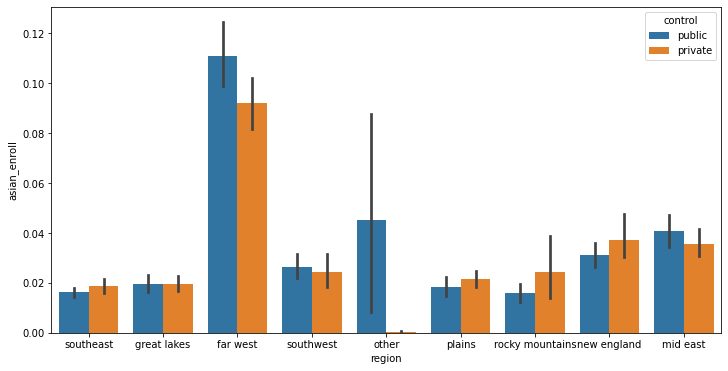

In [38]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_clean, x='region', y='asian_enroll', hue='control')
ax.set(xlabel = "Region", ylabel = "% of Asian Enrollment")

### Admissions Rate by Region

[Text(0.5, 0, 'Region'), Text(0, 0.5, 'Admissions Rate')]

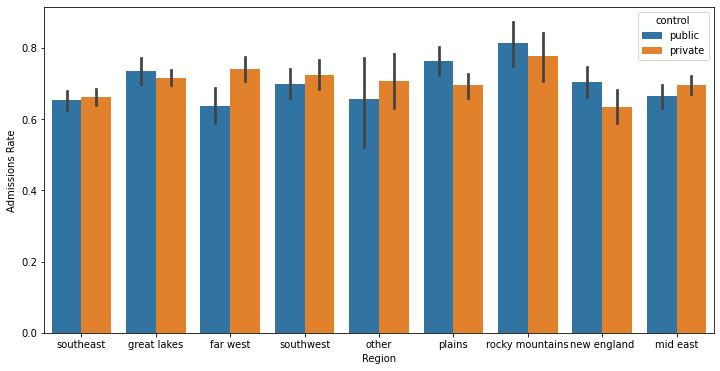

In [39]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=df_clean, x='region', y='adm_rate', hue='control')
ax.set(xlabel = "Region", ylabel = "Admissions Rate")

### Mean Earnings by Region

[Text(0.5, 0, 'Region'),
 Text(0, 0.5, 'Mean Earnings of Working Students 10 Years After Entry')]

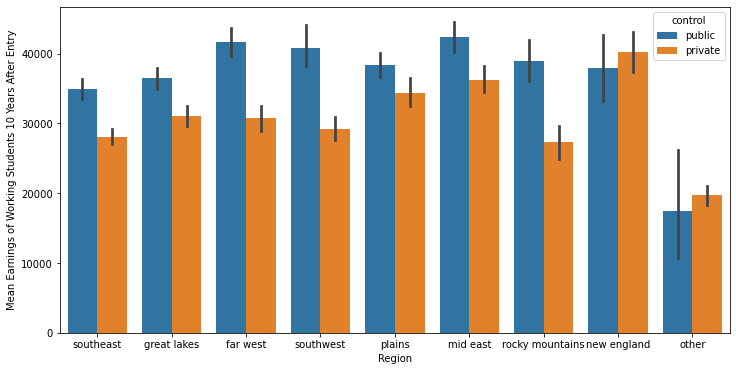

In [40]:
earn = df_merge.dropna(subset=['earnings'])

plt.figure(figsize=(12,6))
ax = sns.barplot(data=earn, x='region', y='earnings', hue='control')
ax.set(xlabel = "Region", ylabel = "Mean Earnings of Working Students 10 Years After Entry")

### Average SAT Score by Region

[Text(0.5, 0, 'Region'), Text(0, 0.5, 'SAT Score')]

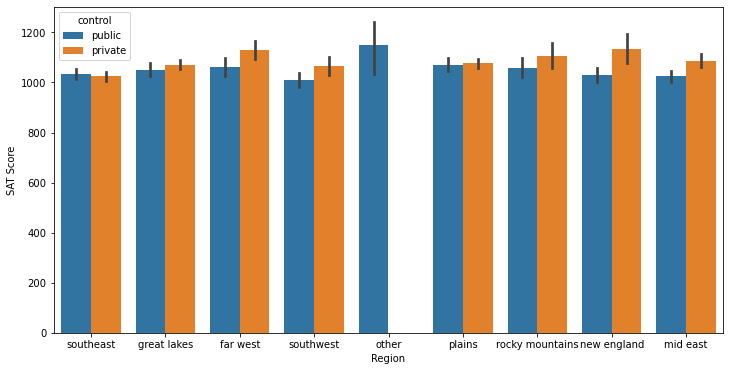

In [41]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=df_clean, x='region', y='avg_sat', hue='control')
ax.set(xlabel = "Region", ylabel = "SAT Score")

### % of Students who Received a Federal Loan by Region

[Text(0.5, 0, 'Region'),
 Text(0, 0.5, '% of Students who Received a Federal Loan')]

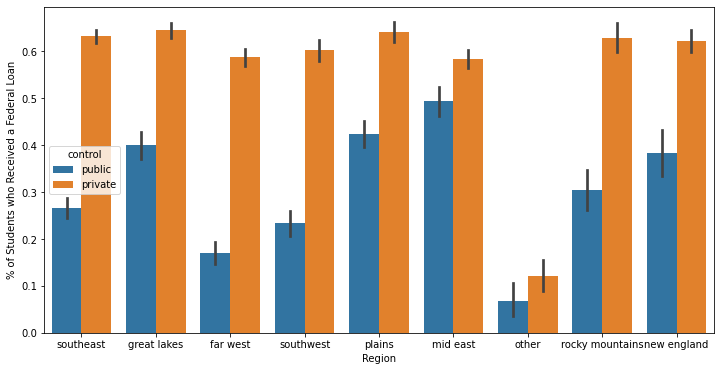

In [42]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=df_merge, x='region', y='loan', hue='control')
ax.set(xlabel = "Region", ylabel = "% of Students who Received a Federal Loan")